**Calculating probability of relations between organizational patterns with Convolutional Neural Network**

Before we start we should identify and understand what problem we have in identification of hidden relationships between organizational patterns with multilayer perceptrons.

Problem with multilayer perceptrons is that they are unable to identify relationships based on the n-gram frequencies between numerous organizational patterns. They are also unable to identify relationships between organizational patterns which have been incorrectly labeled or which are incorporated within another set of the organizational patterns. As we can see, we would not be able to compute with them a probability of existence of relationship between Size The Organization and Architecture Team organizational patterns:

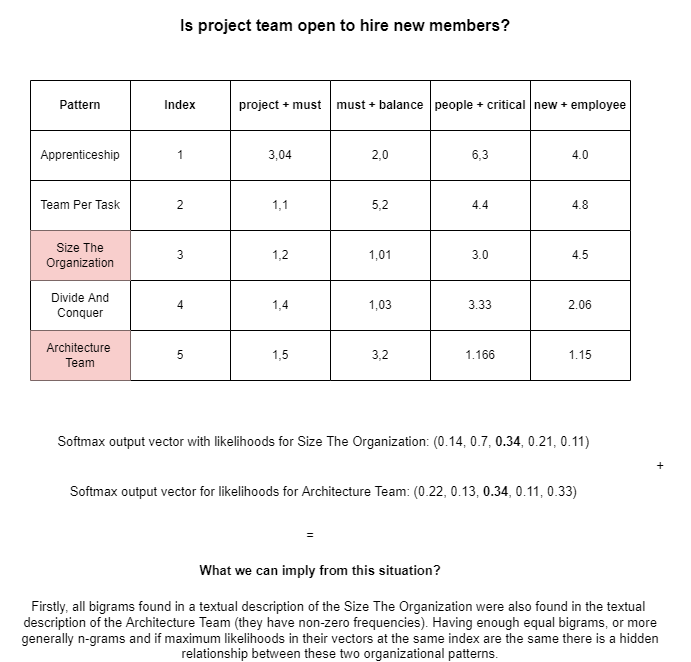

This is where Convolutional Neural Networks come into play to help us. Inspired from the research conducted by Hubel & Wiesel https://bit.ly/3O1Pdm0 we can apply biologically-inspired computing techniques to solve our problem:

1. we will construct convolutional layers as a representation of the topographical map. Topographical map is in our case basically what we're going to work with, it's our information source represented by a table with a n-gram frequencies.<br>
2. each of the convolutional layers would consist of the artificial neurons, where each group of the neurons would be responsible to identify one feature or a given pattern. Neurons with a same functions would be connected together. Neurons would be capable to connect with another group of neurons and thus form a complex representation of information about a given pattern sequence. <br>

In [34]:
# import utilities
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import tensorflow
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

train_pattern_frequencies = pd.read_excel('bigram-pattern-frequencies/for-cnn/bigram-pattern-frequencies-train.xlsx', engine='openpyxl')
train_pattern_frequencies = train_pattern_frequencies.astype({"project+must": int, "must+balance": int, "domain+expertise": int, "need+enough": int, 
                      "enough+people": int, "people+critic": int, "critical+mass": int, "staff+plug": int,
                     "plug+compatible": int, "new+employee": int, "amount+time": int})

train_pattern_frequencies.pop('OrganizationalPattern')
train_patterns = train_pattern_frequencies.pop('PatternIndex')
train_bigrams = train_pattern_frequencies.copy()
train_pattern_frequencies.columns = [''] * 11

train_patterns_descriptions = tf.reshape(train_bigrams, (-1, 18, 11, 1))
train_patterns_names = tf.reshape(train_patterns, [-1, 18])


val_pattern_frequencies = pd.read_excel('bigram-pattern-frequencies/for-cnn/bigram-pattern-frequencies-val.xlsx', engine='openpyxl')
val_pattern_frequencies = val_pattern_frequencies.astype({"project+must": int, "must+balance": int, "domain+expertise": int, "need+enough": int, 
                      "enough+people": int, "people+critic": int, "critical+mass": int, "staff+plug": int,
                     "plug+compatible": int, "new+employee": int, "amount+time": int})

val_pattern_frequencies.pop('OrganizationalPattern')
val_patterns = val_pattern_frequencies.pop('PatternIndex')
val_bigrams = val_pattern_frequencies.copy()
val_pattern_frequencies.columns = [''] * 11

val_patterns_descriptions = tf.reshape(val_bigrams, (-1, 18, 11, 1))
val_patterns_names = tf.reshape(val_patterns, [-1, 18])

**Constructing a Convolutional Neural Network to Identify Organizational Pattern Sequences**

Our convolutional neural network would thus consist of the neurons on the lowest, middle and higher layers. Neurons on the:

1. lowest layer would be responsible (in connection to other neurons) to capture information about patterns at the lowest abstraction level. <br>
2. neurons in the middle (higher) layers of this CNN would be composed together to form a bigger whole. Middle layers are responsible for representation of the more complex information than is formed in the lower layer. <br>
3. neruons at the highest layers of this CNN are exactly those we want. They give its network a power to identify objects it was designed to identify and to identify it in the source which can be noisy or otherwise malformed (e.g., incorrectly labeled dataset). <br>

How can we use a matrix of the n-gram frequencies as an input to Convolutional Neural Network and how does it work? Well, what Multilayer perceptrons basically do from early start is that they flatten its input. This means having a matrix of 11 rows and 11 columns, flattened matrix would be one row with 11x11 values. Working with input like this, multilayer perceptrons loose their spatial information (what values in flattened input represent bigrams of the pattern Size The Organization?)

This is where CNN are able to help us. They help us to abstract an information they find, construct internal representation from a lowest layers to higher and more complex layers. We don't expect them to identify patterns in exact form in how they were found in a training dataset.

No. We expect our CNN to be able to identify patterns in most probably a <u>noisy dataset</u>.

Architecture of this Convolutional Neural Networks is like follows:

1. neural network starts with a set of convolutions. These convolutions are said to be formed of the kernels, or convolutional filters which are specifically designed to learn to identify patterns and features this CNN is intended to do. <br>
2. Activation layers mean applications of activation functions. They are one of the most basic concepts in a theory of neural networks. They say when an information stored in a neuron should be excitited / or inhibited. <br>
3. batch normalization is just one of the optimization techniques.
4. Output from the each convolutional layer is called an activation map. This is quite important to stress. Because if our task would be to classify images, we couldn't call these outputs as images if they would've been translated to }let's say) 54 channels (from RGB) <br>
5. last layers of this CNN are multilayer perceptrons.

In [35]:
model = tf.keras.models.Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(18, 11, 1)))
model.add(Activation('tanh'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('tanh'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('tanh'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('tanh'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('tanh'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(18)) 
model.add(Activation('softmax'))

model.compile(optimizer = tf.keras.optimizers.SGD(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

EPOCHS = 200
BATCH_SIZE = 7

history = model.fit(train_patterns_descriptions, train_patterns_names,  validation_data=(val_patterns_descriptions, val_patterns_names), batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 494.2536 - accuracy: 0.0000e+00 - val_loss: 480.5648 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 52ms/step - loss: 481.1469 - accuracy: 1.0000 - val_loss: 472.4919 - val_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 56ms/step - loss: 471.2601 - accuracy: 1.0000 - val_loss: 475.8919 - val_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 470.4749 - accuracy: 1.0000 - val_loss: 527.6848 - val_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 48ms/step - loss: 512.7695 - accuracy: 1.0000 - val_loss: 717.8568 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 687.1955 - accuracy: 1.0000 - val_loss: 1212.9176 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 40ms/step - loss: 1166.4369 - accuracy: 1.0000 - val_loss: 2312.5767 - val_accu

1/1 [==============================] - 0s 40ms/step - loss: 43942016348539427408153289949184.0000 - accuracy: 1.0000 - val_loss: 93071813859835379198939312947200.0000 - val_accuracy: 1.0000
Epoch 96/200
1/1 [==============================] - 0s 40ms/step - loss: 93071813859835379198939312947200.0000 - accuracy: 1.0000 - val_loss: 197136438554459366068648872509440.0000 - val_accuracy: 1.0000
Epoch 97/200
1/1 [==============================] - 0s 32ms/step - loss: 197136438554459366068648872509440.0000 - accuracy: 1.0000 - val_loss: 417563674436165014969917821157376.0000 - val_accuracy: 1.0000
Epoch 98/200
1/1 [==============================] - 0s 40ms/step - loss: 417563674436165014969917821157376.0000 - accuracy: 1.0000 - val_loss: 884471484095740377024780371492864.0000 - val_accuracy: 1.0000
Epoch 99/200
1/1 [==============================] - 0s 40ms/step - loss: 884471484095740377024780371492864.0000 - accuracy: 1.0000 - val_loss: 1873475708306272639169783329193984.0000 - val_accurac

Epoch 199/200
1/1 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 200/200
1/1 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


**Model Evaluation and Conclusion**

As you can see this convolutional neural network has been a too heavy for our constrained and small dataset. It's able to accurately identify some of the organizational patterns both in training and validation dataset because we have learned it do so. But in the other hand there are some patterns with which it was unable to do so and thus it is expected from us to figure out why. Model accuracy decreases after number of epochs reaches 125 and more. There's is a simple explanation for this behavior. It's because network has learned already all important features it taught it had to do and further optimization would be counterproductive.

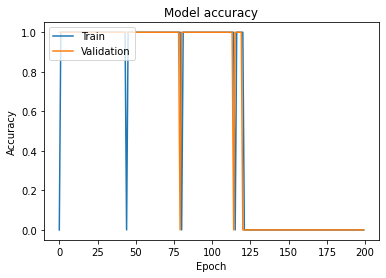

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()